In [13]:
#import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
#load the Data
df=pd.read_excel(r"C:\Users\AREPOGU MOUNIKA\Downloads\dataset -P543.xlsx")
df.head()  #Displays first few rows


,title,rating,body
0,Horrible product,1,Very disappointed with the overall performance...
1,Camera quality is not like 48 megapixel,3,Camera quality is low
2,Overall,4,"Got the mobile on the launch date,Battery must..."
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp..."


In [7]:
#Initial Data Inspection

# Check the shape (rows, columns)
print("Dataset shape:", df.shape)

# Display DataFrame info to see data types and non-null counts
print("\nDataFrame Info:")
df.info()

# List the column names 
print("\nColumns:")
print(df.columns.tolist())


Dataset shape: (1440, 3)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1440 non-null   object
 1   rating  1440 non-null   int64 
 2   body    1440 non-null   object
dtypes: int64(1), object(2)
memory usage: 33.9+ KB

Columns:
['title', 'rating', 'body']


In [29]:
#Descriptive Statistics

# For numerical columns:
print("Summary Statistics (Numerical Data):")
print(df.describe())

# For categorical data (if you have object columns):
print("\nSummary Statistics (Categorical Data):")
print(df.describe(include=['object']))


Summary Statistics (Numerical Data):
            rating
count  1440.000000
mean      3.173611
std       1.584453
min       1.000000
25%       1.000000
50%       4.000000
75%       5.000000
max       5.000000

Summary Statistics (Categorical Data):
                  title                                               body
count              1440                                               1440
unique             1351                                               1440
top     Value for money  Very disappointed with the overall performance...
freq                 16                                                  1


In [24]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])
print("\nNumeric Columns:", df_numeric.columns.tolist())
print(df_numeric.corr())


Numeric Columns: ['rating']
        rating
rating     1.0


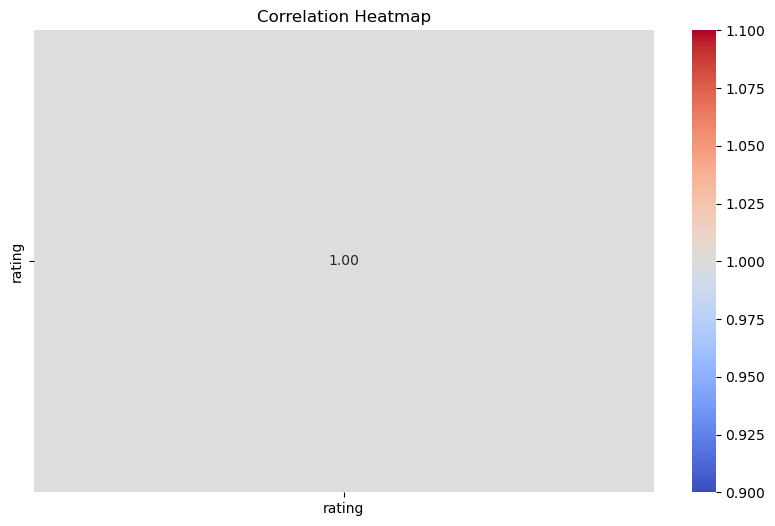

In [25]:
# Correlation Analysis

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [16]:
#Check for Missing Values

# Check and count missing values for each column
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
title     0
rating    0
body      0
dtype: int64


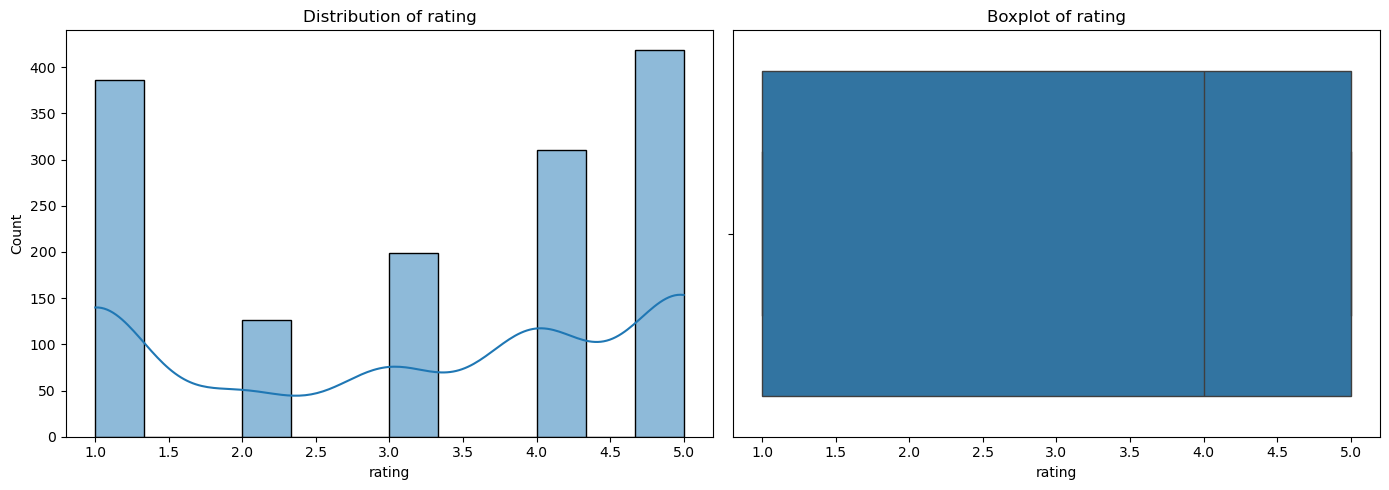

In [21]:
#Visualize Distributions and Outliers

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram with KDE (Kernel Density Estimate)
    sns.histplot(df[col].dropna(), kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {col}')
    
    # Boxplot to visualize potential outliers
    sns.boxplot(x=df[col].dropna(), ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()


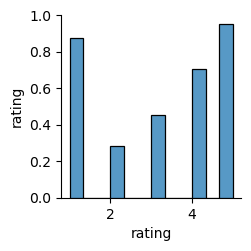

In [16]:
# Creating a pairplot for all numerical columns
sns.pairplot(df[numerical_cols].dropna())
plt.show()